In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import os

In [12]:
labels = {
    0: 'Apple Pie',
    1: 'Baked Potato',
    2: 'Cheesecake',
    3: 'Chicken Curry',
    4: 'Crispy Chicken',
    5: 'Donut',
    6: 'Fries',
    7: 'Hot Dog',
    8: 'Ice Cream',
    9: 'Omelette',
    10: 'Sandwich',
    11: 'Sushi',
    12: 'Taco',
}

In [13]:
model = load_model('Food_Classification_Improved.keras')

In [14]:
prediction = []
original = []
image = []
count = 0
examples_path = 'examples'


# Load images and make predictions
for category in os.listdir(examples_path):
    for item in os.listdir(os.path.join(examples_path, category)):
        img_path = os.path.join(examples_path, category, item)
        img = tf.keras.utils.load_img(img_path, target_size=(150, 150))
        image.append(img)
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 150, 150, 3)
        predict = model.predict(img_array)
        predict_label = np.argmax(predict)
        prediction.append(labels[predict_label])
        original.append(category)

1/1 [==============================] - 0s 94ms/step


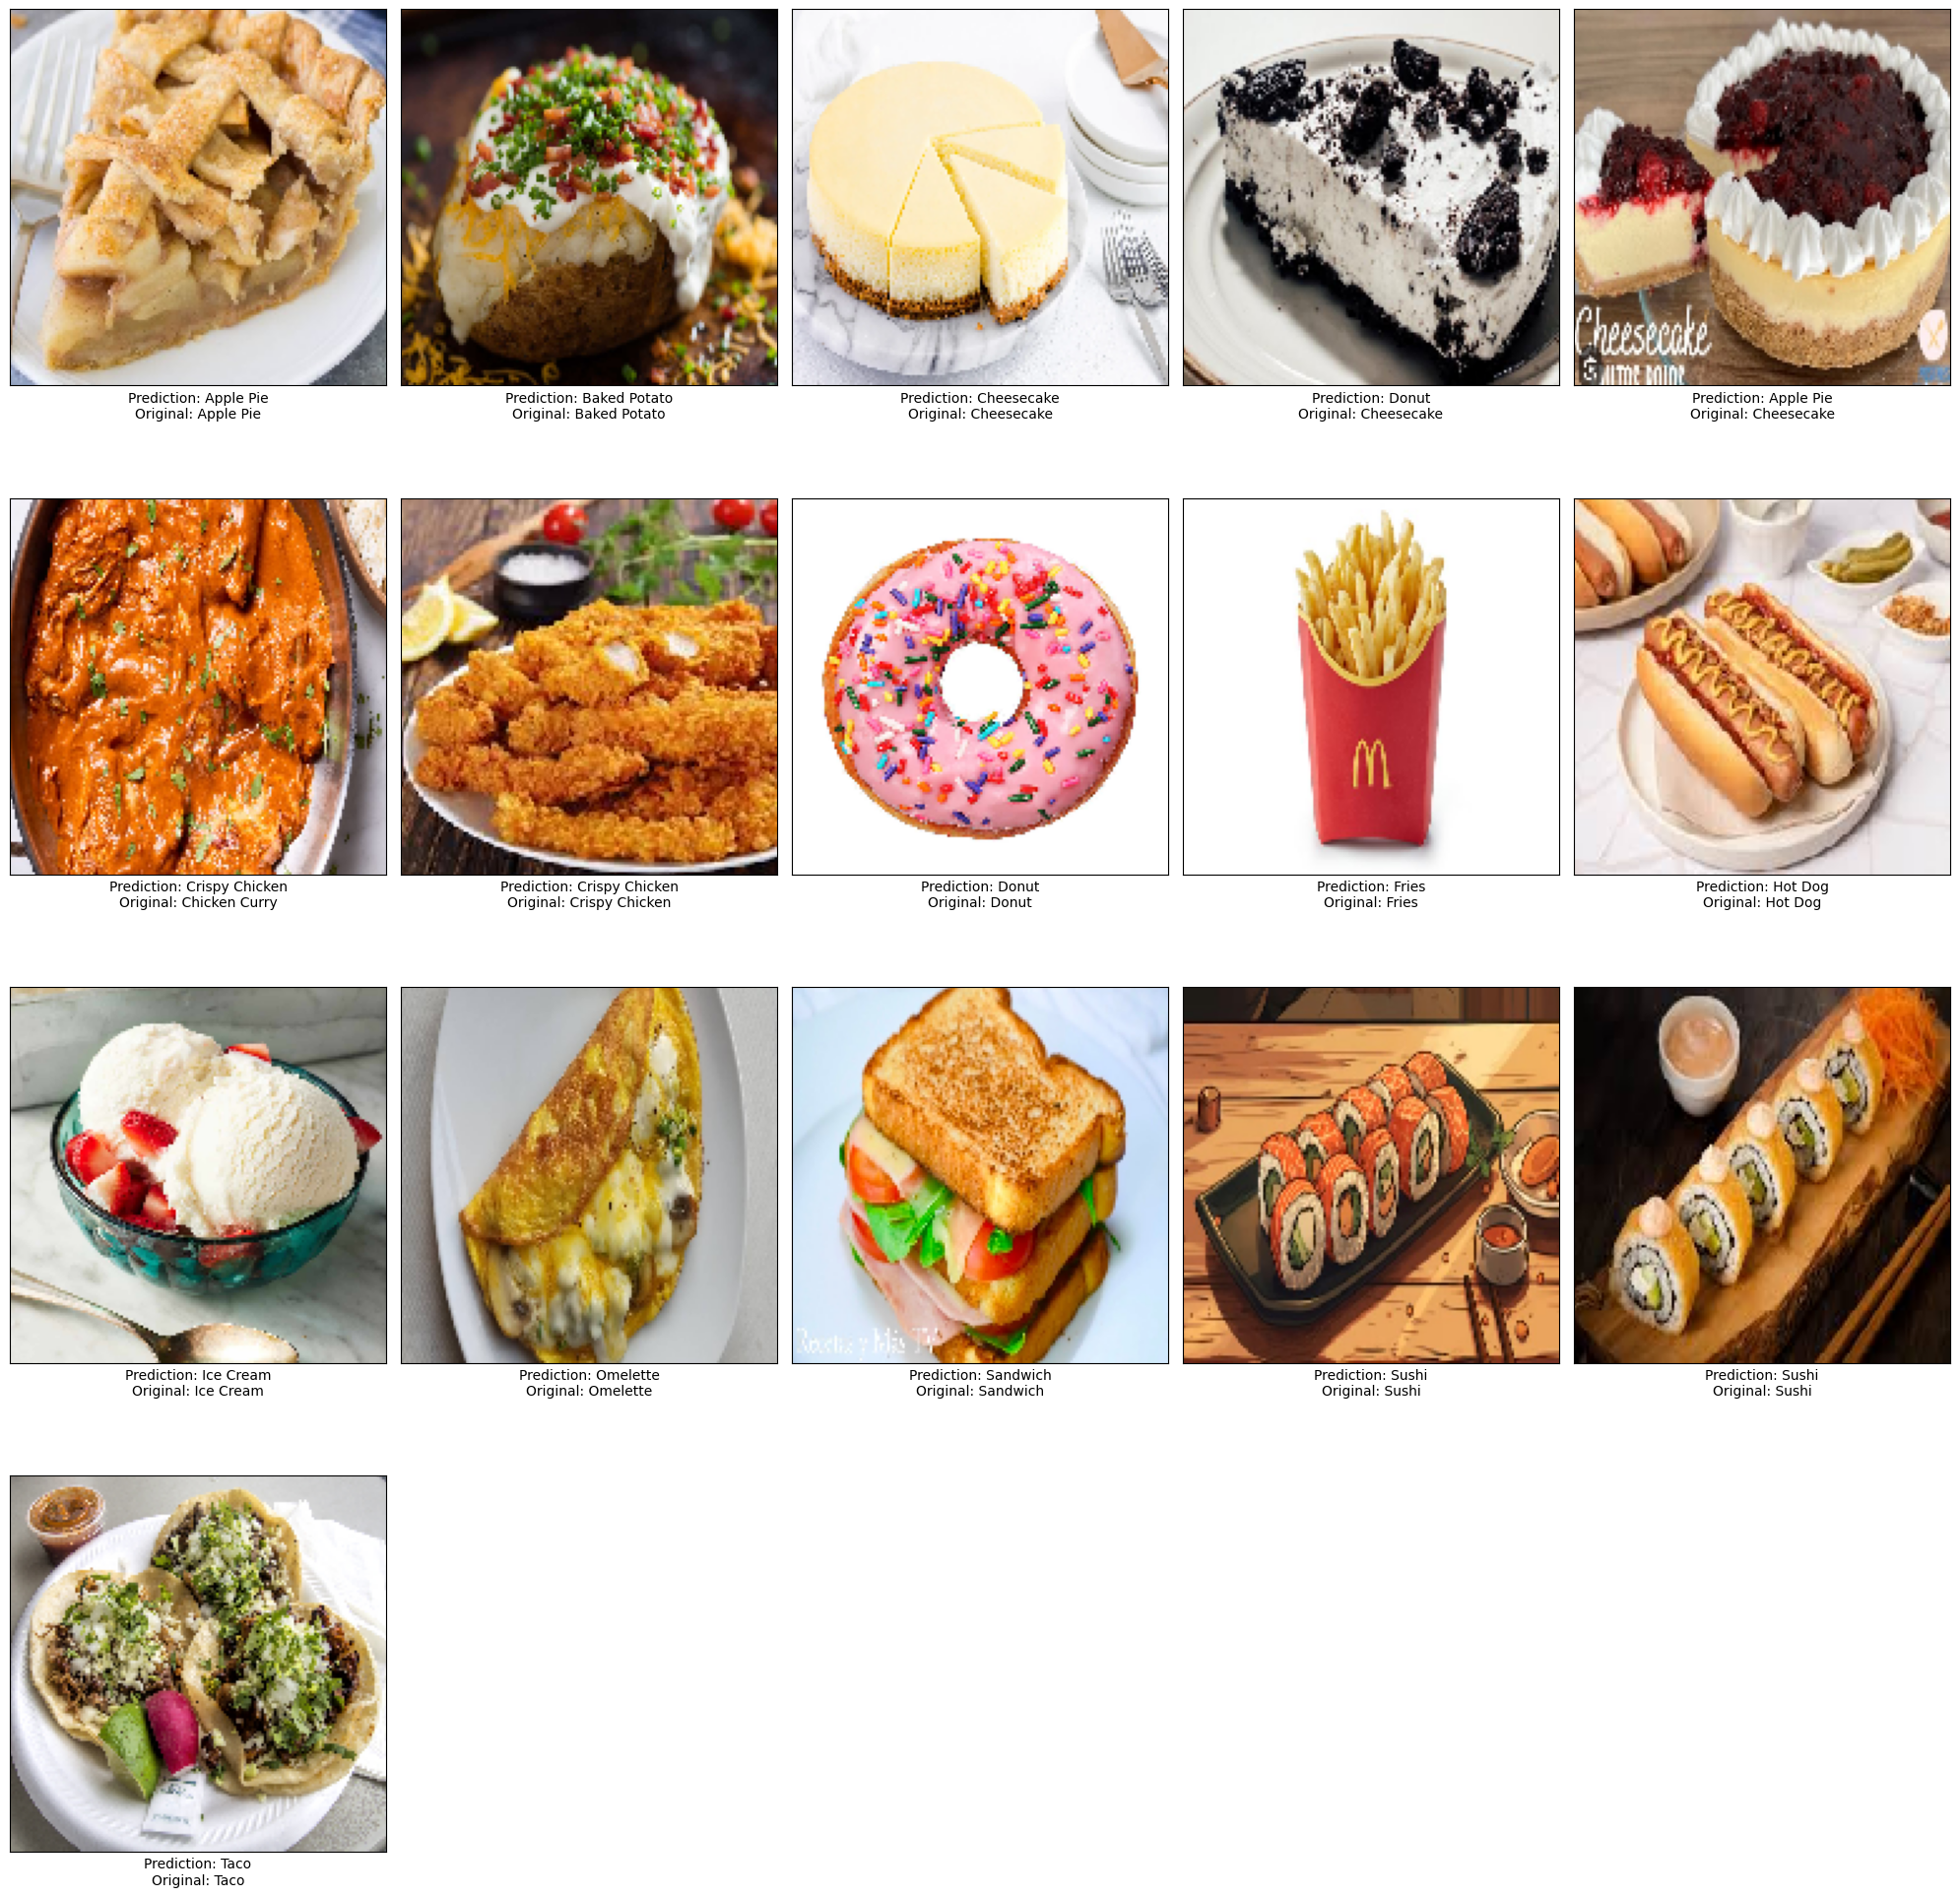

In [15]:
# Number of columns and rows for the subplot grid
cols = 5
rows = (len(image) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for idx, img in enumerate(image):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col]
    ax.imshow(img)
    ax.set_xlabel(f"Prediction: {prediction[idx]}\nOriginal: {original[idx]}")
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any empty subplots if the number of images is not a perfect multiple of cols
for j in range(len(image), rows * cols):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()